# COGS 108 - Final Project 

# Overview

Our project seeks to uncover whether or not there exists a difference in the amount of compensation received between males and females in the software/technology field. From previous research and of societal norms, we believed that women are paid less than men, on average, so that is our belief coming into this project. We are analyzing base annual salary as well as annual and signing bonuses of individuals to get a more holistic representation of the compensation each gender receives. 

# Names

- Steven Tran
- Chong Gu
- Sarah Youn
- Zefeng Xue
- Kuanghanying Zhao


#### Group Members IDs

- A13950948
- A14464757
- A13466746
- A14766403
- A14698283

# Research Question

How large is the gender wage gap between men and women within the tech industry? And which gender, on average, earns more whilst holding similar job titles?

## Background and Prior Work

The gender wage gap has long been an issue in the United States. Recent research suggests that the wage gap has narrowed overall between men and women since the 1980s, but has changed little within the last 15 years. According to the Pew Research Center, women continued to earn about 15% less than men as of 2018 in general (https://www.pewresearch.org/fact-tank/2019/03/22/gender-pay-gap-facts/). This leads us to wonder: does this gap exist tech fields as well? While the number of women in the tech industry is rising, females are still largely considered to be part of the minority, and make up less than 20% of the total number of employees at tech companies ( https://smallbiztrends.com/2018/03/women-in-technology-statistics.html). Given this information, we are curious as to whether or not women earn less than men in the tech fields for the same jobs, and if so, how significant the gap between those earnings are.

This topic is of interest to our group because we all have an interest in technology. Most of us plan to work or be involved in the tech industry in some way in the future. Furthermore, technology continues to become more and more important in our daily lives, greatly affecting society and the way we live. As such, we believe that more women should be encouraged to pursue tech careers to promote innovation and, in doing so, be paid equally to men.


# Hypothesis


In recent years, it seems that the presence of women within the tech industry, specifically in software engineering, has grown significantly. For years, we have heard that women are paid less than men for working the same jobs. We are hypothesizing that this is true for the tech industry -- that is, that the null hypothesis is incorrect and that women do earn less than men on average in tech careers -- but that the gap is not extremely significant. We believe this to be the case because, in general, wage gap studies include men and women with different career paths/, which may skew the data. However, we believe that if men and women with similar career paths/fields are compared to each other, then the average salary, while not exactly the same, will be closer to one another (compared to the wage gap in the general population across all careers/fields).

# Dataset(s)

We are analyzing salaries and overall income of people working in the software technology fields, most of them holding the title of software engineer or other software developer related titles. We have decided to collect data from 2 different sources. Both sources include information about employees in tech careers, including their position title, base salary, signing bonus, and annual bonus. Thus, we plan to combine the datasets based on these similar variables. In one of our datasets, there exists an “annualized salary” variable, while the other only includes a salary and pay frequency. We remedied this by taking the salary and pay frequency and multiplying them together to achieve the annualized salary.

Dataset 1:
* Dataset Name: Salaries
* Link to the dataset: https://gist.github.com/nk412/38e131f55422a3b7422c6f50940a7489
* Number of observations: 3712 (before cleanup)
* Description: This dataset includes the following information about each employee: employer, location, job title, years at employer, years of experience, annual base pay, signing bonus, annual bonus, annual stock value/bonus, and gender. 

Dataset 2:
* Dataset Name: Fall 2015 Salaries
* Link to the dataset: https://github.com/HackathonHackers/data/blob/master/notebooks/fall-2015-salary.csv
* Number of observations: 161 (before cleanup)
* Description: This dataset includes the company name, position title, position type, location, base salary, salary frequency, housing stipend, signing bonus, stock bonuses/benefits, gender, as well as information about education level.

After combining our data, each observation has the following columns:
* Annual Base Pay
* Annual Bonus
* Gender
* Location
* Position Type
* Signing Bonus

We will be comparing individuals from different genders to find out whether or not there exists an income difference. If there is, we want to know how much the difference is and whether or not that difference is significant. We are analyzing “income” as a whole across multiple quantitative variables: Annual Base Pay, Annual Bonuses, and Signing Bonuses. We want to look at all of these income streams to obtain a more holistic view of a person’s income.


# Setup

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import scipy.stats as stats
import copy

# Data Cleaning

To start, we first dropped all the columns in our datasets that were extraneous/unused. Because our project focuses on salary and gender, we removed any columns from the two datasets that were unrelated, including company name, years of experience, college name, and major. We then merged the two datasets together.

Additionally, before cleaning, our dataset had multiple missing values that we think may have been due to a person’s choice of nondisclosure. Fields with missing Salary data have been removed since it is one of our main variables we want to analyze, and we didn’t want the missing data to influence our results. 


In [2]:
#import datasets
df_sal1 = pd.read_csv('salaries.csv')
df_sal2 = pd.read_csv('fall-2015-salary.csv')

#dropping unused columns
df_sal1 = df_sal1.drop(['Timestamp', 'Employer', 'Years at Employer', 'Years of Experience', 'Annual Stock Value/Bonus', 'Additional Comments'], axis=1)
df_sal2 = df_sal2.drop(['Degree Level', 'Last Year of College', 'Timestamp', 'Company Name', 'Position Title', 'Base Salary', 'Salary Frequency', 'Housing Stipend', 'Stock Bonuses/Benefits', 'Stock Vesting Schedule Details', 'Additional Benefits', 'Did You Negotiate the Offer?', 'Did You Accept the Offer?', 'Time Frame From First Interview Invitation to Offer in Weeks', 'Last School Attended', 'Major', 'Additional Information', 'Monthly Salary', 'Annualized Recurring Renumeration (inc. stock)', 'Recurring Renumeration per Month', 'Total First Year Annualized Renumeration(including Signon & Relocation)'], axis=1)

df_sal1 = df_sal1.dropna(axis = 0, how = 'any')
df_sal2 = df_sal2.dropna(axis = 0, how = 'any')

df_sal2 = df_sal2.rename(index=str, columns={'Sex': 'Gender', 'Bonuses per Year': 'Annual Bonus', 'Annualized Salary': 'Annual Base Pay'})
df_sal1 = df_sal1.rename(index=str, columns={'Job Title': 'Position Type'})

df_append = df_sal1.append(df_sal2, sort = True)



Many of the responses under the Annual Base Pay, Annual Bonus, and Signing Bonus columns included extraneous numbers or characters (i.e. 10k instead of 10000) or abbreviations instead of the full word (i.e. hr instead of hour). Thus, we went through each of these columns and replaced these instances so that our data was consistent for our analysis. We also made sure to convert these strings into integers after replacing them. 

In [3]:
for index, row in df_append.iterrows():
    c = row['Annual Base Pay']
    c = c.lower()
    c = c.replace('k', '000')
    df_append.loc[index, 'Annual Base Pay'] = c
    
    if (len(c) > 0 and c[0] == '-'):
        df_append.loc[index, 'Annual Base Pay'] = np.nan
        
    if c.find('hr') != -1 or c.find('hour') != -1:
        tempint = re.sub('[^0-9]','', c)
        tempint = tempint * 2080
        if int(tempint) > 10000000:
            df_append.loc[index, 'Annual Base Pay'] = np.nan
        else:
            c = str(tempint)
            df_append.loc[index, 'Annual Base Pay'] = c
        
    if c.find('≈') != -1:
        df_append.loc[index, 'Annual Base Pay'] = c[c.find('≈'): int(len(c))]
        
    if not c.isdigit():
        tempint = re.sub('[^0-9]','', c)
        df_append.loc[index, 'Annual Base Pay'] = str(tempint)

for index, row in df_append.iterrows():
    c = row['Annual Bonus']
    c = c.lower()
    c = c.replace('k', '000')
    df_append.loc[index, 'Annual Bonus'] = c
    
    if (len(c) > 0 and c[0] == '-'):
        df_append.loc[index, 'Annual Bonus'] = np.nan
        
    if c.find('hr') != -1 or c.find('hour') != -1:
        tempint = re.sub('[^0-9]','', c)
        tempint = tempint * 2080
        if int(tempint) > 10000000:
            df_append.loc[index, 'Annual Bonus'] = np.nan
        else:
            c = str(tempint)
            df_append.loc[index, 'Annual Bonus'] = c
        
    if c.find('≈') != -1:
        df_append.loc[index, 'Annual Bonus'] = c[c.find('≈'): int(len(c))]
        
    if not c.isdigit():
        tempint = re.sub('[^0-9]','', c)
        df_append.loc[index, 'Annual Bonus'] = str(tempint)
        
for index, row in df_append.iterrows():
    c = row['Signing Bonus']
    c = c.lower()
    c = c.replace('k', '000')
    df_append.loc[index, 'Signing Bonus'] = c
    
    if (len(c) > 0 and c[0] == '-'):
        df_append.loc[index, 'Signing Bonus'] = np.nan
        
    if c.find('hr') != -1 or c.find('hour') != -1:
        tempint = re.sub('[^0-9]','', c)
        tempint = tempint * 2080
        if int(tempint) > 10000000:
            df_append.loc[index, 'Signing Bonus'] = np.nan
        else:
            c = str(tempint)
            df_append.loc[index, 'Signing Bonus'] = c
        
    if c.find('≈') != -1:
        df_append.loc[index, 'Signing Bonus'] = c[c.find('≈'): int(len(c))]
        
    if not c.isdigit():
        tempint = re.sub('[^0-9]','', c)
        df_append.loc[index, 'Signing Bonus'] = str(tempint)

df_append = df_append.dropna(axis = 0, how = 'any')

# Convert the type of Annual Base Pay, Annual Bonus and Sigin Bonus from Strings into Integers 
df_append['Annual Base Pay'] = pd.to_numeric(df_append['Annual Base Pay'], errors='coerce')
df_append['Annual Bonus'] = pd.to_numeric(df_append['Annual Bonus'], errors='coerce')
df_append['Signing Bonus'] = pd.to_numeric(df_append['Signing Bonus'], errors='coerce')


To prevent skewed data, we removed outlier values that were extremely high or extremely low. Specifically, we removed Annual Base Pay values under 10,000 and over 1,000,000, Annual Bonus values over 750,000, and Signing Bonus values over 1,000,000.

In [4]:
# Removing extremely high / extremely low numbers
df_append = df_append[df_append['Annual Base Pay'] < 1000000] 
df_append = df_append[df_append['Annual Base Pay'] > 10000] 
df_append = df_append[df_append['Annual Bonus'] < 750000] 
df_append = df_append[df_append['Signing Bonus'] < 1000000] 

# Data Analysis & Results

After cleaning each dataset, we graphed our data to be able to visualize it and analyze the results.

## Bar Plots 
We want to know how many males versus females are in our dataset. To achieve this, we graphed a barplot of the genders. (Note: We would like to acknowledge that only participants that specifically identified themselves as male or female were used for our analysis, and does not include participants that did not disclose their gender or identified as a gender other than male or female).

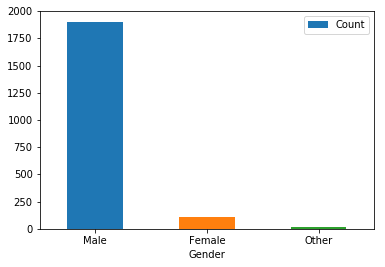

In [5]:
#get 'gender' column
genderCol = df_append['Gender']
numMale = 0
numFemale = 0
numOther = 0

#count number of male, female, other
for x in genderCol:
    if x == 'Male':
        numMale = numMale + 1
    elif x == 'Female':
        numFemale = numFemale + 1
    else:
        numOther = numOther + 1

#plot results
plotDf = pd.DataFrame({'Gender':['Male', 'Female', 'Other'], 'Count':[numMale, numFemale, numOther]})
barPlot = plotDf.plot.bar(x='Gender', y='Count', rot=0)


From the bar plot above, we see that there appears to be many more males than females (approx. 20x more). Unfortunately, we were unable to find more datasets with more female participants, so we had to make do with the datasets we had. Thus, we must take caution in our analysis, and note that the results regarding females may not be as accurate or as representative of the population as males due to the lower number of sample data. 

## Box Plots
Used to illustrate the distribution of the annual base salary, annual bonus salary, and signing bonus salary of each gender. By putting the box plots of both genders in parallel, we are able to compare the differences between the first quartiles, medians, third quartiles, minimums and maximums of the salaries of the two genders. Also, we are able to distinguish the outliers for both genders and how tightly these two groups are grouped.

### Gender vs. Annualized Salary 
We want to analyze annualized salary(quantitative variable) across genders(categorical variable) to see which gender has a higher annualized salary. 
To do this, we clean the dataset and find the mean and median of female's and male's annualized salary.

In [6]:
# Build a new data frame whose gender only contains female and male
df_box_plots_female = df_append.copy()
df_box_plots_male = df_append.copy()
df_box_plots_female = df_box_plots_female[df_box_plots_female['Gender'] == 'Female']
df_box_plots_male = df_box_plots_male[df_box_plots_male['Gender'] == 'Male']
df_box_plots = df_box_plots_female.append(df_box_plots_male, sort = True)

# Drop the person whose salary is greater than 300000
df_box_plots_female = df_box_plots_female[df_box_plots_female['Annual Base Pay'] < 300000] 
df_box_plots_male = df_box_plots_male[df_box_plots_male['Annual Base Pay'] < 300000] 
df_box_plots = df_box_plots[df_box_plots['Annual Base Pay'] < 300000] 

# Show mean and median of female's and male's annualized salary
print("Mean of female's annualized salary: ", df_box_plots_female['Annual Base Pay'].mean())
print("Mean of male's annualized salary: ",df_box_plots_male['Annual Base Pay'].mean())
print("Median of female's annualized salary: ",df_box_plots_female['Annual Base Pay'].median())
print("Median of male's annualized salary: ",df_box_plots_male['Annual Base Pay'].median())

Mean of female's annualized salary:  97764.17475728155
Mean of male's annualized salary:  97314.75426439232
Median of female's annualized salary:  91000.0
Median of male's annualized salary:  95000.0


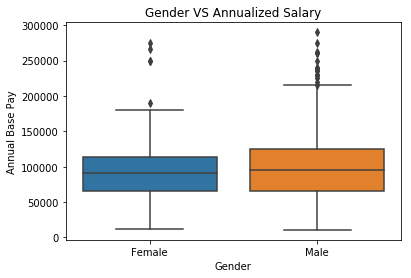

In [7]:
# Generate a boxplot: Gender VS Annualized Salary
sns.boxplot(x = 'Gender', y = 'Annual Base Pay', data = df_box_plots)
ax = plt.gca()
ax.set_title('Gender VS Annualized Salary')
ax.set_ylabel('Annual Base Pay')
ax.set_xlabel('Gender');

From the box plot, we can see that while the minimums and the Q1s are about the same for both genders, median, maximum and the Q3 of males are significantly higher than of females. Moreover, we observe that the female annual base salary are more tightly grouped. While the number of outliers of males are considerably more than females, we take the proportion of the two genders into account. Overall, there is greater variability for the annual base salary of males than females.

### Gender vs. Annual Bonus
We want to analyze annualized salary(quantitative variable) across genders(categorical variable) to see which gender has a higher annual bonus. 
To do this, we clean the dataset and find the mean and median of female's and male's annual bonus.

In [8]:
# Build a new data frame whose gender only contains female and male
df_box_plots_bonus_female = df_append.copy()
df_box_plots_bonus_male = df_append.copy()
df_box_plots_bonus_female = df_box_plots_bonus_female[df_box_plots_bonus_female['Gender'] == 'Female']
df_box_plots_bonus_male = df_box_plots_bonus_male[df_box_plots_bonus_male['Gender'] == 'Male']
df_box_plots_bonus = df_box_plots_bonus_female.append(df_box_plots_bonus_male, sort = True)

# Drop the person whose annual bonus is 0 or greater than 50000 
df_box_plots_bonus_female = df_box_plots_bonus_female[df_box_plots_bonus_female['Annual Bonus'] != 0] 
df_box_plots_bonus_male = df_box_plots_bonus_male[df_box_plots_bonus_male['Annual Bonus'] != 0] 
df_box_plots_bonus = df_box_plots_bonus[df_box_plots_bonus['Annual Bonus'] != 0] 
df_box_plots_bonus_female = df_box_plots_bonus_female[df_box_plots_bonus_female['Annual Bonus'] < 50000] 
df_box_plots_bonus_male = df_box_plots_bonus_male[df_box_plots_bonus_male['Annual Bonus'] < 50000] 
df_box_plots_bonus = df_box_plots_bonus[df_box_plots_bonus['Annual Bonus'] < 50000] 

# Show mean and median of female's and male's annual bonus
print("Mean of female's annual bonus: ", df_box_plots_bonus_female['Annual Bonus'].mean())
print("Mean of male's annual bonus: ",df_box_plots_bonus_male['Annual Bonus'].mean())
print("Median of female's annual bonus: ",df_box_plots_bonus_female['Annual Bonus'].median())
print("Median of male's annual bonus: ",df_box_plots_bonus_male['Annual Bonus'].median())

Mean of female's annual bonus:  10665.459016393443
Mean of male's annual bonus:  10135.993384785006
Median of female's annual bonus:  7900.0
Median of male's annual bonus:  8000.0


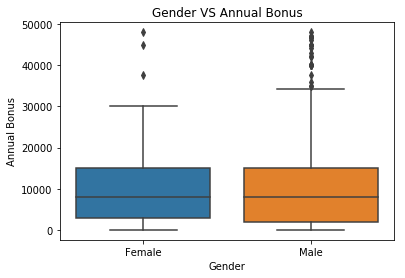

In [9]:
# Generate a boxplot: Gender VS Annual Bonus
sns.boxplot(x = 'Gender', y = 'Annual Bonus', data = df_box_plots_bonus)
ax = plt.gca()
ax.set_title('Gender VS Annual Bonus')
ax.set_ylabel('Annual Bonus')
ax.set_xlabel('Gender');

From the box plot, we observe that the two groups are about the same tightly grouped, with similar minimums, medians, Q1 and Q3. However, the maximum of the male group is visibly higher than of the female group. 

### Gender vs. Signing Bonus
We want to analyze annualized salary(quantitative variable) across genders(categorical variable) to see which gender has a higher signing bonus. 
To do this, we clean the dataset and find the mean and median of female's and male's signing bonus.

In [10]:
# Build a new data frame whose gender only contains female and male
df_box_plots_signing_female = df_append.copy()
df_box_plots_signing_male = df_append.copy()
df_box_plots_signing_female = df_box_plots_signing_female[df_box_plots_signing_female['Gender'] == 'Female']
df_box_plots_signing_male = df_box_plots_signing_male[df_box_plots_signing_male['Gender'] == 'Male']
df_box_plots_signing = df_box_plots_signing_female.append(df_box_plots_signing_male, sort = True)

# Drop the person whose signing bonus is 0 or greater than 50000
df_box_plots_signing_female = df_box_plots_signing_female[df_box_plots_signing_female['Signing Bonus'] != 0] 
df_box_plots_signing_male = df_box_plots_signing_male[df_box_plots_signing_male['Signing Bonus'] != 0] 
df_box_plots_signing = df_box_plots_signing[df_box_plots_signing['Signing Bonus'] != 0] 
df_box_plots_signing_female = df_box_plots_signing_female[df_box_plots_signing_female['Signing Bonus'] < 50000] 
df_box_plots_signing_male = df_box_plots_signing_male[df_box_plots_signing_male['Signing Bonus'] < 50000] 
df_box_plots_signing = df_box_plots_signing[df_box_plots_signing['Signing Bonus'] < 50000] 

# Show mean and median of female's and male's signing bonus
print("Mean of female's signing bonus: ", df_box_plots_signing_female['Signing Bonus'].mean())
print("Mean of male's signing bonus: ",df_box_plots_signing_male['Signing Bonus'].mean())
print("Median of female's signing bonus: ",df_box_plots_signing_female['Signing Bonus'].median())
print("Median of male's signing bonus: ",df_box_plots_signing_male['Signing Bonus'].median())

Mean of female's signing bonus:  11199.162162162162
Mean of male's signing bonus:  11330.866228070176
Median of female's signing bonus:  10000.0
Median of male's signing bonus:  10000.0


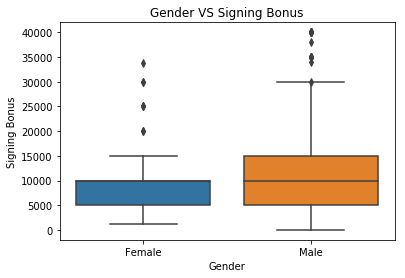

In [11]:
# Generate a boxplot: Gender VS Signing Bonus
sns.boxplot(x = 'Gender', y = 'Signing Bonus', data = df_box_plots_signing)
ax = plt.gca()
ax.set_title('Gender VS Signing Bonus')
ax.set_ylabel('Signing Bonus')
ax.set_xlabel('Gender');

From the box plot, we observe that while the median and Q1 of the two groups are close to each other (the median of female group lies on the Q3 value), male group is a lot less tightly grouped and has Q3, maximum and outliers that are significantly higher than those values of female group. 

In all, we conclude that the salaries are varied amongst the most positive quartile group and similar for the least positive quartile group in general, and the skew of the box plots might suggest that it is more likely for males to earn higher income than females. However, we do acknowledge that the proportion of the two gender groups could result in inaccuracy and noise in the data, therefore drawing the inaccurate conclusion.

# Scatter Plot

These plots were utilized to see the distribution of base salaries against bonuses. We wanted to uncover whether the amount of base pay a person makes is proportional to the bonuses that they receive and whether or not a certain gender may make more in bonuses than the other (considering that they make the same salary).

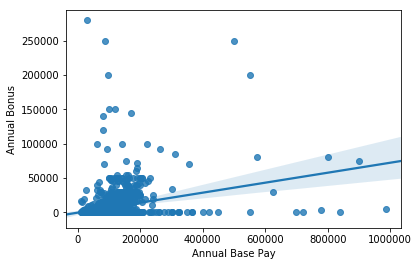

Correlation Coefficient:  0.2804735029570316


In [12]:
#Male Annual Base Pay vs Annual Bonus
male_only = df_append[df_append['Gender'] == 'Male'] 
sns.regplot(male_only['Annual Base Pay'], male_only['Annual Bonus'])
plt.show()

#Calculating correlation value
corrCoeff1 = np.corrcoef(male_only['Annual Base Pay'], male_only['Annual Bonus'])
print("Correlation Coefficient: ", corrCoeff1[0][1])

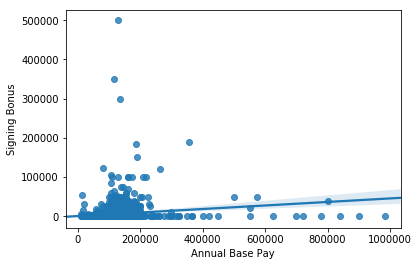

Correlation Coefficient:  0.15253852239386925


In [13]:
#Male Annual Base Pay vs Signing Bonus
sns.regplot(male_only['Annual Base Pay'], male_only['Signing Bonus'])
plt.show()

#Calculating correlation value
corrCoeff2 = np.corrcoef(male_only['Annual Base Pay'], male_only['Signing Bonus'])
print("Correlation Coefficient: ", corrCoeff2[0][1])

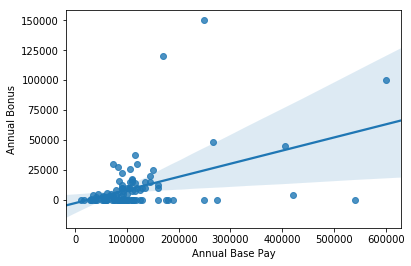

Correlation Coefficient:  0.4510814118828829


In [14]:
#Female Annual Base Pay vs Annual Bonus
female_only = df_append[df_append['Gender'] == 'Female'] 
sns.regplot(female_only['Annual Base Pay'], female_only['Annual Bonus'])
plt.show()

#Calculating correlation value
corrCoeff3 = np.corrcoef(female_only['Annual Base Pay'], female_only['Annual Bonus'])
print("Correlation Coefficient: ", corrCoeff3[0][1])

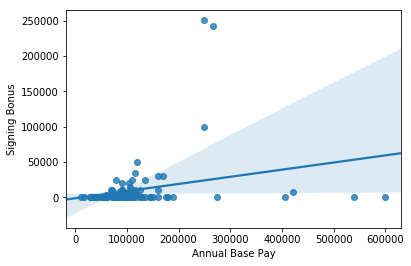

Correlation Coefficient:  0.2610293660258317


In [15]:
#Female Annual Base Pay vs Signing Bonus
sns.regplot(female_only['Annual Base Pay'], female_only['Signing Bonus'])
plt.show()

#Calculating correlation value
corrCoeff4 = np.corrcoef(female_only['Annual Base Pay'], female_only['Signing Bonus'])
print("Correlation Coefficient: ", corrCoeff4[0][1])

From our findings in our scatter plots, we can obviously see that the plots for females is much more variable because there aren't as many sample data for females. Our findings show that for both annual bonus and signing bonus, females had a higher correlation value. This means that females generally earn more in bonuses than males do when considering the per dollar annual base salary females receive. These results may also be skewed because there are more male observations.

## Density Plot 
We created density plots to investigate the distribution of salaries across each gender in our dataset. 

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


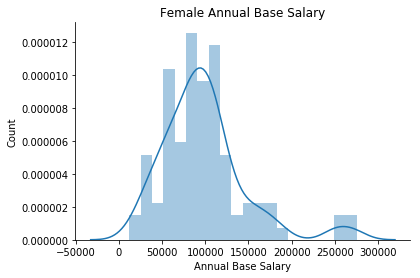

In [16]:
# Build a data frame for density plot of female's annual base salary
df_density_plots_female = df_append.copy()
df_density_plots_female = df_density_plots_female[df_density_plots_female['Gender'] == 'Female']
df_density_plots_female = df_density_plots_female.drop(columns = ['Annual Bonus', 'Location', 'Position Type', 'Signing Bonus'])
df_density_plots_female = df_density_plots_female[df_density_plots_female['Annual Base Pay'] < 300000] 

# Generate a density plot 
ax = sns.distplot(df_density_plots_female['Annual Base Pay'], bins= 20)
sns.despine()
ax.set_title('Female Annual Base Salary')
ax.set_ylabel('Count')
ax.set_xlabel('Annual Base Salary');

This plot is less uniform that the male density plot due to the smaller number of observations. The peak of the curve also occurs around $97k mark.

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


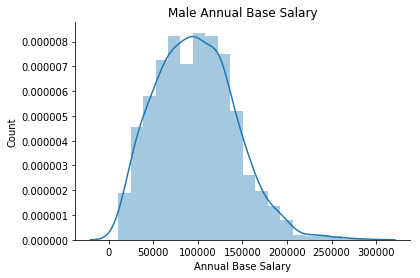

In [17]:
# Build a data frame for density plot of male's annual base salary
df_density_plots_male = df_append.copy()
df_density_plots_male = df_density_plots_male[df_density_plots_male['Gender'] == 'Male']
df_density_plots_male = df_density_plots_male.drop(columns = ['Annual Bonus', 'Location', 'Position Type', 'Signing Bonus'])
df_density_plots_male = df_density_plots_male[df_density_plots_male['Annual Base Pay'] < 300000] 

# Generate a density plot 
ax = sns.distplot(df_density_plots_male['Annual Base Pay'], bins= 20)
sns.despine()
ax.set_title('Male Annual Base Salary')
ax.set_ylabel('Count')
ax.set_xlabel('Annual Base Salary');

This plot looks more smooth and uniform due the high amount of observations. The peak of the curve occurs at the $97k mark.

We already know from the box plots that we made previously that the male and female average salaries are the same , give or take approx. $450. From this density plot, we sought to learn more about the distribution as opposed to just the mean or median values. There doesn’t seem to be any obvious differences in distributions between the two density plots. We suspect the differences in the plots are only a result of the differences in the number of observations. 

# Ethics & Privacy

All the data was pulled from public Github repositories. Given this, and the fact that there is no permission limitation, we can assert that we can use them for our purposes. In terms of privacy, we are assuming that all of the salary information is consensually self-reported through Google Forms. Since we don’t know exactly where this data came from, why it was collected, and how accurate all the self-reported entries are, we had to take into account different methods to eliminate biases and unreliable data. There are many limitations to self-reported salaries. People may enter a higher or lower than realistic salary because they don’t want their real numbers shown. Others might elect to simply not disclose their salary or put a random absurd number as a joke. We made sure to heavily clean the data and get rid of extraneous observations (for instance, salaries that were 10x the mean base salary).

Since we are not going to publish the data with identifiers of the individual that are defined by the Safe Harbor method, such as names, phone numbers, email addresses, SSN, etc, we have followed the privacy rule.   

There may be biases within our data based on how it was collected. Questions that we thought about include, ‘Who was the data collected from?’, ‘Why were there significantly more male observations than female?’, and ‘Who was included/excluded from the data collection process?’ We would like to acknowledge that only participants that specifically identified themselves as male or female were used for our analysis, and does not include participants that choose not to disclose their gender or identified as a gender other than male or female. Other biases include the idea that women generally earn less than men due to different education statuses, different ethnicities, different locations,  different job titles, etc. To handle these biases, we chose to compare salaries between men and women who hold similar job titles. 

We do not believe that our analysis will be harmful to any individuals or groups of people. None of our data is associated with personal identifiers like names, addresses, or phone numbers. Additionally, we made sure to remove company/employer names in our dataset so that specific companies could not be identified, harmed, or profited off of. 

# Conclusion & Discussion

Our project sought to discover whether or not there was a difference in the amount of compensation received between males and females in the technology field. We focused on individuals that held job titles in the software field, such as software engineering and developing. From previous research (and from societal norms), we believed that, on average, women are paid less than men. Therefore, we hypothesized that the data would show the same. 

In doing so, we did not want to simply compare and contrast salary results across genders. As a result, we developed a more holistic representation of compensation, including annual base pay, bonuses, stock options, etc. 

Though our analysis, we showed that males and females receive a roughly equivalent amount of compensation when it came to median earnings, but that males earned more in other areas, such as signing bonuses. Therefore, we accept our hypothesis that males generally earn more and reject the null hypothesis, but not strongly. Because our data had approx. 20 times more male observations than females, we cannot conclude this with 100% absoluteness. Our results were likely skewed by giving us an inaccurate representation of the mean female salaries/bonuses, possibly yielding a higher number than what might be true of the population mean.

The main limitation of our project was the available data that we were able to find online. Although there are plenty of news and articles regarding the high salary of tech employees in general, it was difficult to find explicit datasets on earnings of individuals in the field. In addition, income itself is a very sensitive question, and people tend not to willingly share sensitive information on surveys that are available to the general public.

Our findings shed light on the software industry to advocate for equal pay and treatment towards all, disregarding gender, race, and background. With technology becoming more and more prevalent in everyday aspects of life, it is especially important that males and females are given the chance to contribute and be treated equally in the tech industry. 

After a quarter of hard work, we found out that although there is not a significant difference in median pay amongst males and females for similar job titles, males still earn higher in other areas, such as signing bonuses. This means that the average earnings for males is still higher than that of females; around three or four thousand per year.  

As time progresses, the issue of the gender wage gap continues to improve. However, this does not mean that the issue has been solved. As we discovered, there are still many problems, including the amount males are paid versus that of females. Moving forward, we hope that all genders are paid the same and treated equally -- not only in the tech field, but in all other fields as well. 
